In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
base=pd.read_csv('weatherAUS.csv')
base.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


##  Exploratory Data Analysis

In [5]:
base.shape

(8425, 23)

In [6]:
base.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# calculating the missing values

In [8]:
base.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
base.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## fill the null values,by help mode and mean

In [10]:
base['MinTemp']=base['MinTemp'].fillna(base['MinTemp'].mean())
base['MaxTemp']=base['MaxTemp'].fillna(base['MaxTemp'].mean())
base['Rainfall']=base['Rainfall'].fillna(base['Rainfall'].mean())
base['Evaporation']=base['Evaporation'].fillna(base['Evaporation'].mean())
base['Sunshine']=base['Sunshine'].fillna(base['Sunshine'].mean())
base['WindGustSpeed']=base['WindGustSpeed'].fillna(base['WindGustSpeed'].mean())
base['WindSpeed9am']=base['WindSpeed9am'].fillna(base['WindSpeed9am'].mean())
base['WindSpeed3pm']=base['WindSpeed3pm'].fillna(base['WindSpeed3pm'].mean())
base['Humidity9am']=base['Humidity9am'].fillna(base['Humidity9am'].mean())
base['Humidity3pm']=base['Humidity3pm'].fillna(base['Humidity3pm'].mean())
base['Pressure9am']=base['Pressure9am'].fillna(base['Pressure9am'].mean())
base['Pressure3pm']=base['Pressure3pm'].fillna(base['Pressure3pm'].mean())
base['Cloud9am']=base['Cloud9am'].fillna(base['Cloud9am'].mean())
base['Cloud3pm']=base['Cloud3pm'].fillna(base['Cloud3pm'].mean())
base['Temp9am']=base['Temp9am'].fillna(base['Temp9am'].mean())
base['Temp3pm']=base['Temp3pm'].fillna(base['Temp3pm'].mean())

In [11]:
base['RainToday']=base['RainToday'].fillna(base['RainToday'].mode()[0])
base['RainTomorrow']=base['RainTomorrow'].fillna(base['RainTomorrow'].mode()[0])
base['WindDir9am'] = base['WindDir9am'].fillna(base['WindDir9am'].mode()[0])
base['WindGustDir'] = base['WindGustDir'].fillna(base['WindGustDir'].mode()[0])
base['WindDir3pm'] = base['WindDir3pm'].fillna(base['WindDir3pm'].mode()[0])

## Seeing the Null Values in the Database are filled

In [12]:
base.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# visualzing the data set


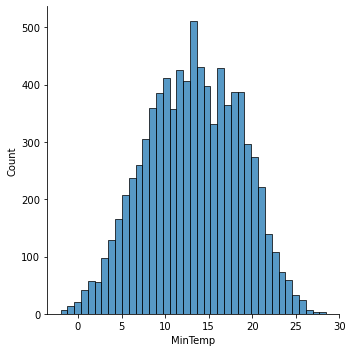

In [13]:
#let's see how data is distributed for every columns
sns.displot(base.MinTemp)

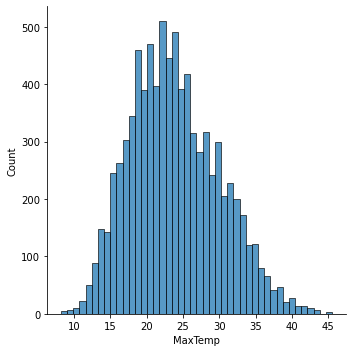

In [14]:
sns.displot(base.MaxTemp)

<AxesSubplot:xlabel='Rainfall', ylabel='count'>

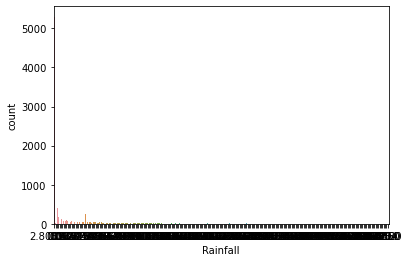

In [17]:
sns.countplot(base.Rainfall)

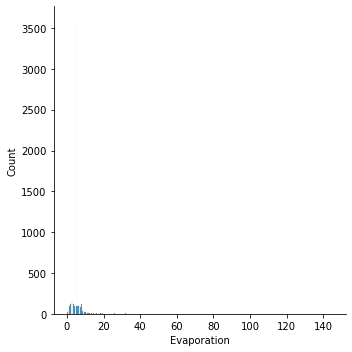

In [18]:
sns.displot(base.Evaporation)

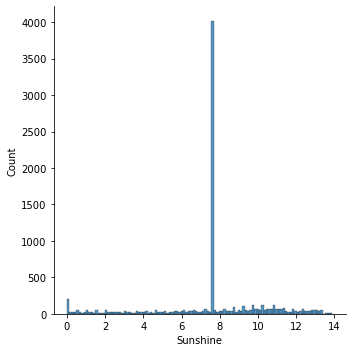

In [19]:
sns.displot(base.Sunshine)

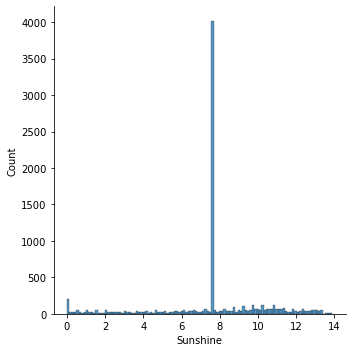

In [20]:
sns.displot(base.Sunshine)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

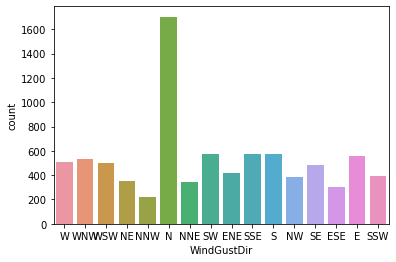

In [21]:
sns.countplot(base.WindGustDir)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

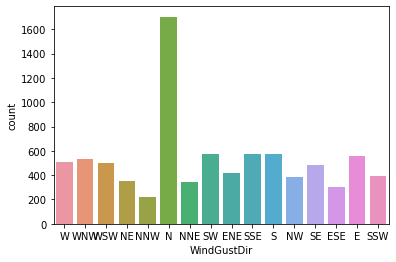

In [22]:
sns.countplot(base.WindGustDir)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

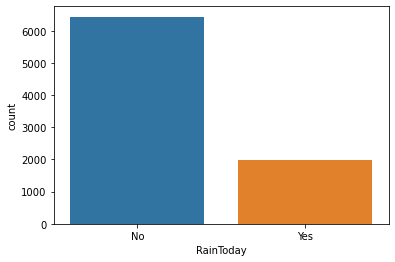

In [23]:
sns.countplot(base.RainToday)

## check mulicolinearity

In [24]:
base.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.717522,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520
MaxTemp,0.717522,1.000000,-0.087451,0.322405,0.378403,0.139998,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506
Rainfall,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.086000,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687
Evaporation,0.254965,0.322405,0.023517,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109
Sunshine,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324
WindGustSpeed,0.230058,0.139998,0.086000,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199
WindSpeed9am,0.136872,0.013314,0.050631,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,-0.174679,-0.138454,-0.000549,0.058198,0.109798,-0.002606
WindSpeed3pm,0.178349,0.088172,0.024791,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,-0.251697,-0.207544,0.005061,0.003295,0.184188,0.066087
Humidity9am,-0.130731,-0.390976,0.228800,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,0.142374,0.173415,0.404742,0.296862,-0.378344,-0.382401
Humidity3pm,0.079048,-0.421879,0.235444,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,0.001629,0.070369,0.424348,0.439965,-0.130414,-0.491485


### in this data set all the features have less than 75% multicolinearity to label data.so we can mover further for  labal incoding

## Data pre-processing

#### Apply LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = base.select_dtypes(include=['object']).columns

elements

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [26]:
for i in elements:
    base[i] = enc.fit_transform(base[i])

In [27]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   int32  
 1   Location       8425 non-null   int32  
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   int32  
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   int32  
 10  WindDir3pm     8425 non-null   int32  
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

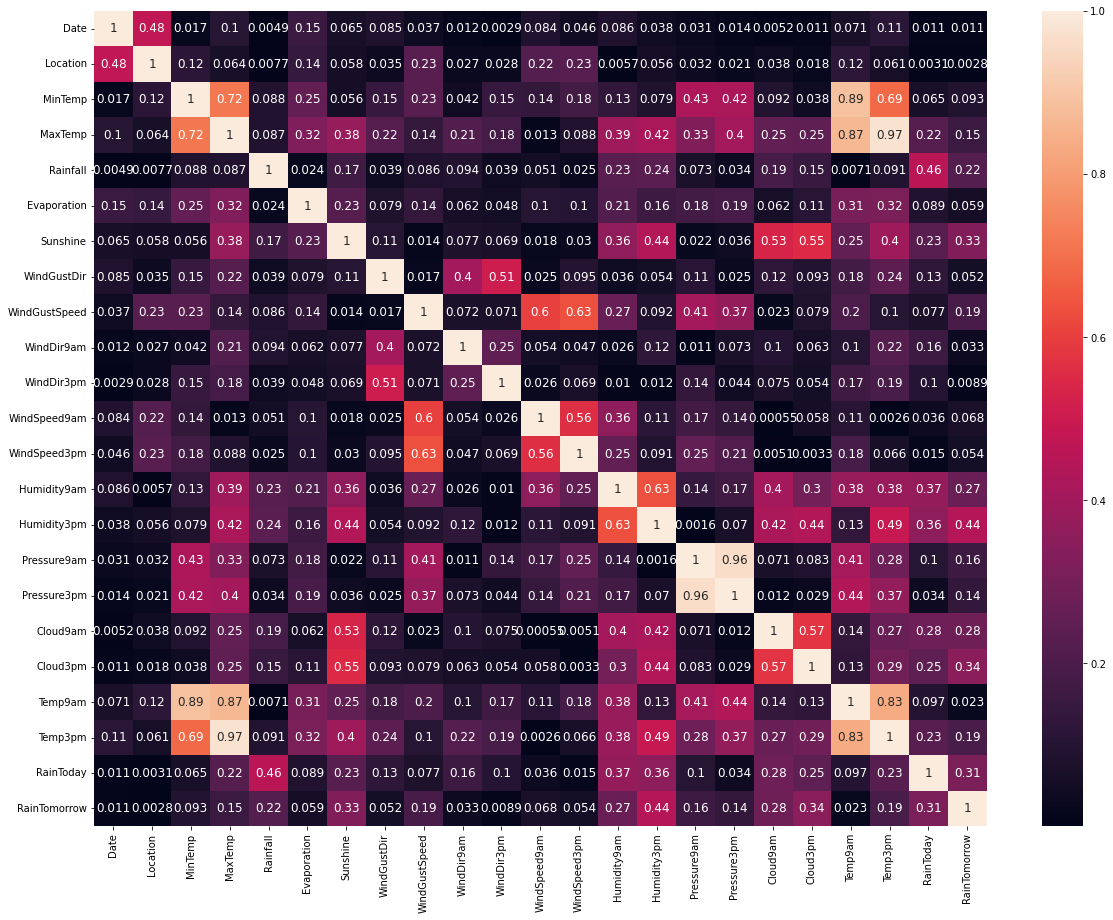

In [28]:
base_corr = base.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(base_corr , annot = True, annot_kws={'size':12})
plt.show()

In [29]:
x = base.drop(['RainTomorrow'], axis=1)
y = base['RainTomorrow']

In [30]:
x.skew().sort_values(ascending = False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
Date              0.386560
MaxTemp           0.380654
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
Location         -0.050456
MinTemp          -0.089989
WindDir3pm       -0.119847
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

In [31]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [32]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

RainToday        1.242362
Rainfall         0.904387
Evaporation      0.080305
WindGustSpeed    0.010481
Pressure9am      0.002514
Pressure3pm      0.001772
Temp3pm         -0.009893
MaxTemp         -0.010591
WindSpeed3pm    -0.037553
Humidity3pm     -0.038753
Temp9am         -0.048994
Humidity9am     -0.067235
Sunshine        -0.075544
WindSpeed9am    -0.079333
MinTemp         -0.102983
WindDir9am      -0.155025
Date            -0.166431
Location        -0.186657
WindGustDir     -0.187177
Cloud3pm        -0.220610
WindDir3pm      -0.248689
Cloud9am        -0.282006
dtype: float64

In [33]:
x = pd.DataFrame(x_new, columns = x.columns)

### checking outlier

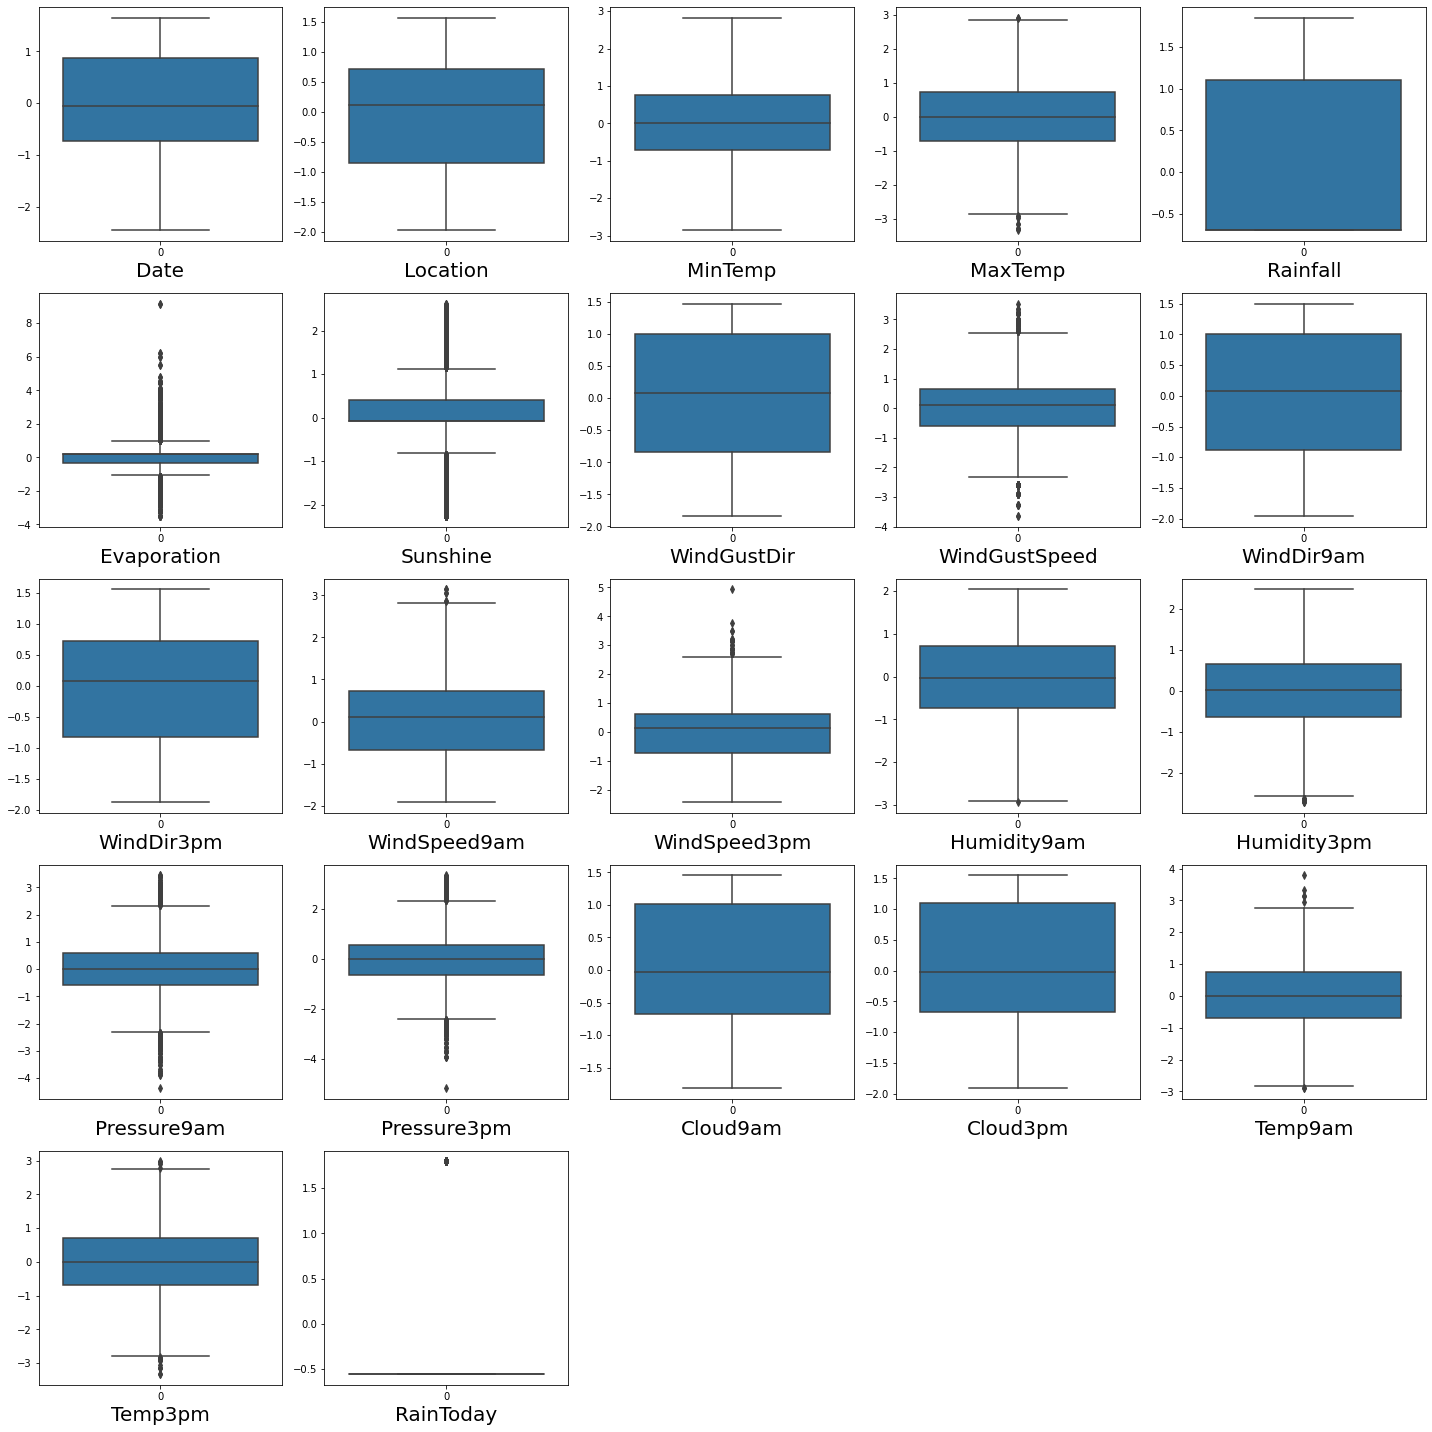

In [34]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(data=x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [35]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Date              True
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am       True
Humidity3pm       True
Pressure9am      False
Pressure3pm      False
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm           True
RainToday         True
dtype: bool
****************************************
Low Side Outliers Present
Date              True
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am      False
Pressure3pm      Fal

In [36]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [37]:
Evaporation_high = q3.Evaporation + (1.5 * iqr.Evaporation)

# Check the Indexes which have higher values

index1 = np.where(x['Evaporation']> Evaporation_high)

x = x.drop(x['Evaporation'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)








(7674, 22)
(7674,)


In [38]:
WindGustSpeed_high = q3.WindGustSpeed + (1.5 * iqr.WindGustSpeed)

# Check the Indexes which have higher values

index1 = np.where(x['WindGustSpeed']> WindGustSpeed_high)

x = x.drop(x['WindGustSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)


(7622, 22)
(7622,)


In [39]:
Pressure9am_high = q3.WindSpeed9am + (1.5 * iqr.WindSpeed9am)

# Check the Indexes which have higher values

index1 = np.where(x['WindSpeed9am']> Pressure9am_high )

x = x.drop(x['WindSpeed9am'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)


(7622, 22)
(7622,)


In [40]:
WindSpeed9am_high = q3.WindSpeed9am + (1.5 * iqr.WindSpeed9am)

# Check the Indexes which have higher values

index1 = np.where(x['WindSpeed9am']> WindSpeed9am_high)

x = x.drop(x['WindSpeed9am'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7622, 22)
(7622,)


In [41]:
WindSpeed3pm_high = q3.WindSpeed3pm + (1.5 * iqr.WindSpeed3pm)

# Check the Indexes which have higher values

index1 = np.where(x['WindSpeed3pm']> WindSpeed3pm_high)

x = x.drop(x['WindSpeed3pm'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7596, 22)
(7596,)


In [42]:
Pressure9am_high = q3.Pressure9am + (1.5 * iqr.Pressure9am)

# Check the Indexes which have higher values

index1 = np.where(x['Pressure9am']> Pressure9am_high )

x = x.drop(x['Pressure9am'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7489, 22)
(7489,)


In [43]:
Pressure3pm_high = q3.Pressure9am + (1.5 * iqr.Pressure3pm)

# Check the Indexes which have higher values

index1 = np.where(x['Pressure3pm']> Pressure3pm_high )

x = x.drop(x['Pressure3pm'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7468, 22)
(7468,)


In [44]:
MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)

# Check the Indexes which have low values

index1 = np.where(x['MaxTemp']< MaxTemp_low  )

x = x.drop(x['MaxTemp'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(7460, 22)
(7460,)


In [45]:
Evaporation_low = q1.Evaporation- (1.5 * iqr.Evaporation)

# Check the Indexes which have low values

index1 = np.where(x['Evaporation']< Evaporation_low )

x = x.drop(x['Evaporation'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6416, 22)
(6416,)


In [46]:
WindGustSpeed_low = q1.WindGustSpeed- (1.5 * iqr.WindGustSpeed)

# Check the Indexes which have low values

index1 = np.where(x['WindGustSpeed']< WindGustSpeed_low  )

x = x.drop(x['WindGustSpeed'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6337, 22)
(6337,)


In [47]:
Pressure9am_low = q1.Pressure9am- (1.5 * iqr.Pressure9am)

# Check the Indexes which have low values

index1 = np.where(x['Pressure9am']< Pressure9am_low  )

x = x.drop(x['Pressure9am'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6262, 22)
(6262,)


In [48]:
Temp3pm_low = q1.Temp3pm- (1.5 * iqr.Temp3pm)

# Check the Indexes which have low values

index1 = np.where(x['Temp3pm']< Temp3pm_low  )

x = x.drop(x['Temp3pm'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(6256, 22)
(6256,)


In [49]:
# Percentage Data Loss

Data_loss = ((8425-7178)/8425)*100

Data_loss


14.801186943620179

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.384697,Date
1,1.441264,Location
2,8.251736,MinTemp
3,21.716268,MaxTemp
4,5.122468,Rainfall
5,1.199468,Evaporation
6,1.647929,Sunshine
7,1.572042,WindGustDir
8,1.991144,WindGustSpeed
9,1.311322,WindDir9am


In [52]:
x = x.drop(['Temp3pm'], axis=1)

x.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday
0,-2.463238,-1.57287,0.041124,-0.077141,0.534236,0.195503,-0.082709,1.160646,0.380260,1.179858,...,0.717901,0.614414,0.154357,-1.646951,-1.578925,-1.307581,1.452968,-0.016506,-0.146566,-0.556099
1,-2.434742,-1.57287,-1.076281,0.280346,-0.698529,0.195503,-0.082709,1.319872,0.380260,-0.140685,...,-0.990902,0.427141,-1.396996,-1.463657,-1.121066,-1.195423,-0.027810,-0.016506,-0.093095,-0.556099
2,-2.412661,-1.57287,-0.051713,0.374368,-0.698529,0.195503,-0.082709,1.474872,0.515699,1.179858,...,0.638532,0.796788,-1.708910,-1.165434,-1.594687,-1.051163,-0.027810,-1.094761,0.581022,-0.556099
3,-2.393929,-1.57287,-0.740202,0.722385,-0.698529,0.195503,-0.082709,-0.578373,-1.265782,0.473499,...,-0.090148,-0.967416,-1.343706,-2.025863,-0.009847,-0.393155,-0.027810,-0.016506,0.067087,-0.556099
4,-2.377348,-1.57287,0.800894,1.327005,0.888946,0.195503,-0.082709,1.160646,0.169468,-1.528740,...,-0.554287,0.234391,0.844633,-0.990253,-1.089435,-1.483748,1.013885,1.547621,0.013732,-0.556099


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.383949,Date
1,1.435866,Location
2,8.183348,MinTemp
3,8.420699,MaxTemp
4,5.122019,Rainfall
5,1.199430,Evaporation
6,1.647667,Sunshine
7,1.568404,WindGustDir
8,1.970843,WindGustSpeed
9,1.311036,WindDir9am


In [55]:
x['pressure avg']=(x['Pressure9am']+x['Pressure3pm'])/2

In [58]:
x = x.drop(['Pressure9am','Pressure3pm','Temp9am'], axis=1)

x.head()

KeyError: "['Pressure9am' 'Pressure3pm' 'Temp9am'] not found in axis"

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.353218,Date
1,1.435258,Location
2,4.392898,MinTemp
3,4.821149,MaxTemp
4,5.093348,Rainfall
5,1.187336,Evaporation
6,1.633295,Sunshine
7,1.560002,WindGustDir
8,1.939222,WindGustSpeed
9,1.291606,WindDir9am


## model building

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [62]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier(),
         SVC()]

for rs in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.8439897698209718 random_state 1 Model LogisticRegression()
Accuracy score 0.9066496163682864 random_state 1 Model RandomForestClassifier()
Accuracy score 0.850383631713555 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.8337595907928389 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8983375959079284 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='au

Accuracy score 0.8772378516624041 random_state 8 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8433503836317136 random_state 8 Model SVC()
Accuracy score 0.8235294117647058 random_state 9 Model LogisticRegression()
Accuracy score 0.8702046035805626 random_state 9 Model RandomForestClassifier()
Accuracy score 0.832480818414

Accuracy score 0.8561381074168798 random_state 15 Model SVC()
Accuracy score 0.8312020460358056 random_state 16 Model LogisticRegression()
Accuracy score 0.8957800511508951 random_state 16 Model RandomForestClassifier()
Accuracy score 0.8388746803069054 random_state 16 Model DecisionTreeClassifier()
Accuracy score 0.8312020460358056 random_state 16 Model KNeighborsClassifier()
Accuracy score 0.8932225063938619 random_state 16 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estima

Accuracy score 0.8222506393861893 random_state 23 Model KNeighborsClassifier()
Accuracy score 0.8970588235294118 random_state 23 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8497442455242967 random_state 23 Model SVC()
Accuracy score 0.8363171355498721 random_state 24 Model LogisticRegression()
Accuracy score 0.8951406649

Accuracy score 0.8548593350383632 random_state 30 Model SVC()
Accuracy score 0.8260869565217391 random_state 31 Model LogisticRegression()
Accuracy score 0.8842710997442456 random_state 31 Model RandomForestClassifier()
Accuracy score 0.8267263427109974 random_state 31 Model DecisionTreeClassifier()
Accuracy score 0.8254475703324808 random_state 31 Model KNeighborsClassifier()
Accuracy score 0.8829923273657289 random_state 31 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estima

Accuracy score 0.8241687979539642 random_state 38 Model KNeighborsClassifier()
Accuracy score 0.8989769820971867 random_state 38 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8523017902813299 random_state 38 Model SVC()
Accuracy score 0.8267263427109974 random_state 39 Model LogisticRegression()
Accuracy score 0.8817135549

Accuracy score 0.8497442455242967 random_state 45 Model SVC()
Accuracy score 0.8459079283887468 random_state 46 Model LogisticRegression()
Accuracy score 0.9021739130434783 random_state 46 Model RandomForestClassifier()
Accuracy score 0.829923273657289 random_state 46 Model DecisionTreeClassifier()
Accuracy score 0.8228900255754475 random_state 46 Model KNeighborsClassifier()
Accuracy score 0.8887468030690537 random_state 46 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimat

Accuracy score 0.8305626598465473 random_state 53 Model KNeighborsClassifier()
Accuracy score 0.8759590792838875 random_state 53 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8446291560102301 random_state 53 Model SVC()
Accuracy score 0.8248081841432225 random_state 54 Model LogisticRegression()
Accuracy score 0.8791560102

Accuracy score 0.8427109974424553 random_state 60 Model SVC()
Accuracy score 0.8312020460358056 random_state 61 Model LogisticRegression()
Accuracy score 0.8906649616368286 random_state 61 Model RandomForestClassifier()
Accuracy score 0.828005115089514 random_state 61 Model DecisionTreeClassifier()
Accuracy score 0.8343989769820972 random_state 61 Model KNeighborsClassifier()
Accuracy score 0.8932225063938619 random_state 61 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimat

Accuracy score 0.8248081841432225 random_state 68 Model KNeighborsClassifier()
Accuracy score 0.8797953964194374 random_state 68 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8459079283887468 random_state 68 Model SVC()
Accuracy score 0.8529411764705882 random_state 69 Model LogisticRegression()
Accuracy score 0.9060102301

Accuracy score 0.8446291560102301 random_state 75 Model SVC()
Accuracy score 0.8331202046035806 random_state 76 Model LogisticRegression()
Accuracy score 0.8842710997442456 random_state 76 Model RandomForestClassifier()
Accuracy score 0.8356777493606138 random_state 76 Model DecisionTreeClassifier()
Accuracy score 0.8324808184143222 random_state 76 Model KNeighborsClassifier()
Accuracy score 0.8829923273657289 random_state 76 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estima

Accuracy score 0.8427109974424553 random_state 83 Model KNeighborsClassifier()
Accuracy score 0.8868286445012787 random_state 83 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.868925831202046 random_state 83 Model SVC()
Accuracy score 0.8331202046035806 random_state 84 Model LogisticRegression()
Accuracy score 0.88491048593

Accuracy score 0.8459079283887468 random_state 90 Model SVC()
Accuracy score 0.829923273657289 random_state 91 Model LogisticRegression()
Accuracy score 0.8772378516624041 random_state 91 Model RandomForestClassifier()
Accuracy score 0.8228900255754475 random_state 91 Model DecisionTreeClassifier()
Accuracy score 0.8254475703324808 random_state 91 Model KNeighborsClassifier()
Accuracy score 0.8861892583120204 random_state 91 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimat

Accuracy score 0.8107416879795396 random_state 98 Model KNeighborsClassifier()
Accuracy score 0.8887468030690537 random_state 98 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8382352941176471 random_state 98 Model SVC()
Accuracy score 0.8132992327365729 random_state 99 Model LogisticRegression()
Accuracy score 0.8836317135

Accuracy score 0.8650895140664961 random_state 105 Model SVC()
Accuracy score 0.829923273657289 random_state 106 Model LogisticRegression()
Accuracy score 0.8829923273657289 random_state 106 Model RandomForestClassifier()
Accuracy score 0.8209718670076727 random_state 106 Model DecisionTreeClassifier()
Accuracy score 0.8158567774936062 random_state 106 Model KNeighborsClassifier()
Accuracy score 0.8797953964194374 random_state 106 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_e

Accuracy score 0.8267263427109974 random_state 113 Model KNeighborsClassifier()
Accuracy score 0.887468030690537 random_state 113 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8388746803069054 random_state 113 Model SVC()
Accuracy score 0.829923273657289 random_state 114 Model LogisticRegression()
Accuracy score 0.89002557

Accuracy score 0.8324808184143222 random_state 120 Model SVC()
Accuracy score 0.8356777493606138 random_state 121 Model LogisticRegression()
Accuracy score 0.8957800511508951 random_state 121 Model RandomForestClassifier()
Accuracy score 0.8439897698209718 random_state 121 Model DecisionTreeClassifier()
Accuracy score 0.829923273657289 random_state 121 Model KNeighborsClassifier()
Accuracy score 0.889386189258312 random_state 121 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_es

Accuracy score 0.8312020460358056 random_state 128 Model KNeighborsClassifier()
Accuracy score 0.8887468030690537 random_state 128 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8535805626598465 random_state 128 Model SVC()
Accuracy score 0.8228900255754475 random_state 129 Model LogisticRegression()
Accuracy score 0.878516

Accuracy score 0.8561381074168798 random_state 135 Model SVC()
Accuracy score 0.8286445012787724 random_state 136 Model LogisticRegression()
Accuracy score 0.8913043478260869 random_state 136 Model RandomForestClassifier()
Accuracy score 0.8267263427109974 random_state 136 Model DecisionTreeClassifier()
Accuracy score 0.8171355498721228 random_state 136 Model KNeighborsClassifier()
Accuracy score 0.8849104859335039 random_state 136 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

Accuracy score 0.8171355498721228 random_state 143 Model KNeighborsClassifier()
Accuracy score 0.881074168797954 random_state 143 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8395140664961637 random_state 143 Model SVC()
Accuracy score 0.8248081841432225 random_state 144 Model LogisticRegression()
Accuracy score 0.8861892

Accuracy score 0.8535805626598465 random_state 150 Model SVC()
Accuracy score 0.8203324808184144 random_state 151 Model LogisticRegression()
Accuracy score 0.8778772378516624 random_state 151 Model RandomForestClassifier()
Accuracy score 0.8286445012787724 random_state 151 Model DecisionTreeClassifier()
Accuracy score 0.8158567774936062 random_state 151 Model KNeighborsClassifier()
Accuracy score 0.8772378516624041 random_state 151 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

Accuracy score 0.8069053708439897 random_state 158 Model KNeighborsClassifier()
Accuracy score 0.8861892583120204 random_state 158 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8407928388746803 random_state 158 Model SVC()
Accuracy score 0.8433503836317136 random_state 159 Model LogisticRegression()
Accuracy score 0.897058

Accuracy score 0.8548593350383632 random_state 165 Model SVC()
Accuracy score 0.8145780051150895 random_state 166 Model LogisticRegression()
Accuracy score 0.8855498721227621 random_state 166 Model RandomForestClassifier()
Accuracy score 0.8369565217391305 random_state 166 Model DecisionTreeClassifier()
Accuracy score 0.829923273657289 random_state 166 Model KNeighborsClassifier()
Accuracy score 0.8932225063938619 random_state 166 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_e

Accuracy score 0.819693094629156 random_state 173 Model KNeighborsClassifier()
Accuracy score 0.889386189258312 random_state 173 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8433503836317136 random_state 173 Model SVC()
Accuracy score 0.8260869565217391 random_state 174 Model LogisticRegression()
Accuracy score 0.87020460

Accuracy score 0.842071611253197 random_state 180 Model SVC()
Accuracy score 0.8324808184143222 random_state 181 Model LogisticRegression()
Accuracy score 0.8919437340153452 random_state 181 Model RandomForestClassifier()
Accuracy score 0.8337595907928389 random_state 181 Model DecisionTreeClassifier()
Accuracy score 0.8203324808184144 random_state 181 Model KNeighborsClassifier()
Accuracy score 0.9040920716112532 random_state 181 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_e

Accuracy score 0.840153452685422 random_state 188 Model KNeighborsClassifier()
Accuracy score 0.8861892583120204 random_state 188 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8516624040920716 random_state 188 Model SVC()
Accuracy score 0.8184143222506394 random_state 189 Model LogisticRegression()
Accuracy score 0.8772378

Accuracy score 0.8567774936061381 random_state 195 Model SVC()
Accuracy score 0.8184143222506394 random_state 196 Model LogisticRegression()
Accuracy score 0.8797953964194374 random_state 196 Model RandomForestClassifier()
Accuracy score 0.8292838874680307 random_state 196 Model DecisionTreeClassifier()
Accuracy score 0.8222506393861893 random_state 196 Model KNeighborsClassifier()
Accuracy score 0.8817135549872123 random_state 196 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_

In [63]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Max Accuracy score is 0.9072890025575447 at random_state 199 for Model: SVC()


## Cross Validation Score

In [64]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 199)

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

for i in range (2,11):
    cvscore = cross_val_score(svc, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8554987212276215
At CV: 2
Cross Validation Score is:  82.86445012787725
Accuracy_Score is :  0.8554987212276215
At CV: 3
Cross Validation Score is:  80.41879439880502
Accuracy_Score is :  0.8554987212276215
At CV: 4
Cross Validation Score is:  83.1042199488491
Accuracy_Score is :  0.8554987212276215
At CV: 5
Cross Validation Score is:  80.62591460378023
Accuracy_Score is :  0.8554987212276215
At CV: 6
Cross Validation Score is:  82.04952555163172
Accuracy_Score is :  0.8554987212276215
At CV: 7
Cross Validation Score is:  83.45603405915904
Accuracy_Score is :  0.8554987212276215
At CV: 8
Cross Validation Score is:  83.55179028132993
Accuracy_Score is :  0.8554987212276215
At CV: 9
Cross Validation Score is:  83.99905363065868
Accuracy_Score is :  0.8554987212276215
At CV: 10
Cross Validation Score is:  84.23953993610223
Accuracy_Score is :  0.8554987212276215


In [65]:
cvscore_selected = cross_val_score(svc, x_scaled, y, cv = 6).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(y_test, y_pred))

The CV Score is:  0.8204952555163172 
The Accuracy_Score is:  0.8554987212276215


## Parameter Tuning using GridSearchCV

In [66]:
# HyperParameter Tuning

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grd = GridSearchCV(svc, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

svc_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', svc_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

conf_mat ==> 
 [[1155   52]
 [ 168  189]]

Accuracy rf Normal ==> 
 0.8593350383631714


In [67]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1207
           1       0.78      0.53      0.63       357

    accuracy                           0.86      1564
   macro avg       0.83      0.74      0.77      1564
weighted avg       0.85      0.86      0.85      1564



In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = True)

print(fpr)
print('*******')
print(tpr)
print('*******')
print(thresholds)

[0.         0.04308202 1.        ]
*******
[0.         0.52941176 1.        ]
*******
[2 1 0]


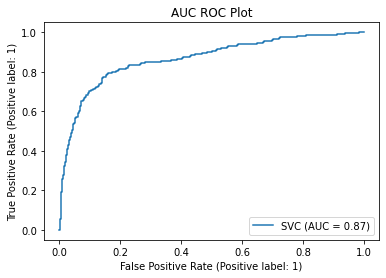

In [69]:
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## Prediction for Rainfall

In [72]:
base.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [74]:
x_c = pd.concat([x,y],axis=1)

In [75]:
x_c.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,pressure avg,RainTomorrow
0,-2.463238,-1.57287,0.041124,-0.077141,0.534236,0.195503,-0.082709,1.160646,0.380260,1.179858,1.349376,0.717901,0.614414,0.154357,-1.646951,1.452968,-0.016506,-0.556099,-1.443253,0
1,-2.434742,-1.57287,-1.076281,0.280346,-0.698529,0.195503,-0.082709,1.319872,0.380260,-0.140685,1.552244,-0.990902,0.427141,-1.396996,-1.463657,-0.027810,-0.016506,-0.556099,-1.158245,0
2,-2.412661,-1.57287,-0.051713,0.374368,-0.698529,0.195503,-0.082709,1.474872,0.515699,1.179858,1.552244,0.638532,0.796788,-1.708910,-1.165434,-0.027810,-1.094761,-0.556099,-1.322925,0
3,-2.393929,-1.57287,-0.740202,0.722385,-0.698529,0.195503,-0.082709,-0.578373,-1.265782,0.473499,-1.874337,-0.090148,-0.967416,-1.343706,-2.025863,-0.027810,-0.016506,-0.556099,-0.201501,0
4,-2.377348,-1.57287,0.800894,1.327005,0.888946,0.195503,-0.082709,1.160646,0.169468,-1.528740,-0.137530,-0.554287,0.234391,0.844633,-0.990253,1.013885,1.547621,-0.556099,-1.286592,0


In [101]:
x_c = x.drop(['Rainfall'], axis=1)
y_c = x['Rainfall']

print(x_c.shape)
print(y_c.shape)

(6254, 18)
(6254,)


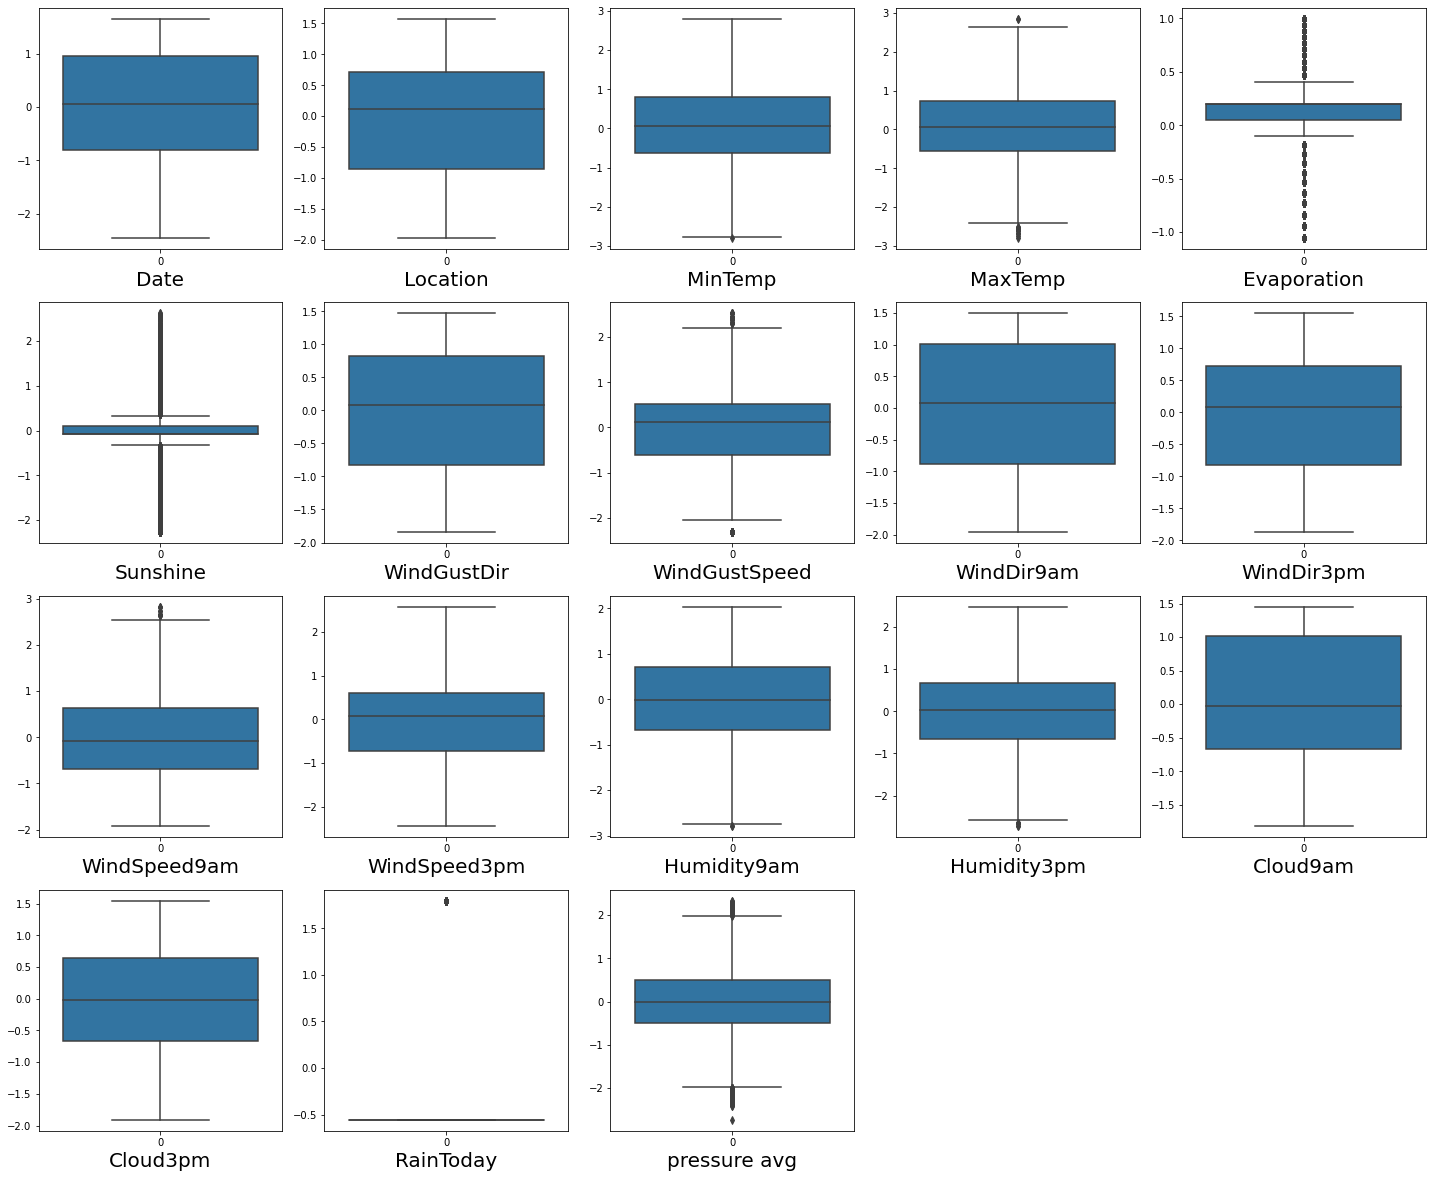

In [102]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x_c:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(data=x_c[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [145]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x_c)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x_c)>-3).all())

High Side Outliers present
Date              True
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Cloud9am          True
Cloud3pm          True
RainToday         True
pressure avg      True
pressure_avg      True
dtype: bool
****************************************
Low Side Outliers Present
Date              True
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Cloud9am          True
Cloud3pm          True
RainToday         True
pressure avg     Fal

In [146]:
MaxTemp_high = q3.MaxTemp + (1.5 * iqr.MaxTemp)

# Check the Indexes which have higher values

index1 = np.where(x_c['MaxTemp']> MaxTemp_high)

x_c = x_c.drop(x_c['MaxTemp'].index[index1])

y_c = y_c.drop(y_c.index[index1])

print(x_c.shape)
print(y_c.shape)

(6254, 20)
(6254,)


In [147]:
MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)

# Check the Indexes which have low values

index1 = np.where(x_c['MaxTemp']< MaxTemp_low)

x_c = x_c.drop(x_c['MaxTemp'].index[index1])

y_c = y_c.drop(y_c.index[index1])

print(x_c.shape)
print(y_c.shape)

(6254, 20)
(6254,)


In [150]:
x_c['pressure_avg']=x_c['pressure avg']

In [156]:
x_c=x_c.drop('pressure avg',axis=1)

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_c.scaled = scaler.fit_transform(x_c)

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_c.scaled , i) for i in range (x_c.scaled.shape[1])]

vif['features'] = x_c.columns


# Lets check the values 
vif

,vif,features
0,1.352342,Date
1,1.435350,Location
2,4.386410,MinTemp
3,4.809320,MaxTemp
4,5.094093,Rainfall
5,1.187525,Evaporation
6,1.633389,Sunshine
7,1.559654,WindGustDir
8,1.939267,WindGustSpeed
9,1.292205,WindDir9am


In [160]:
from sklearn.svm import SVR

In [161]:
max_r2_score = 0
maxRS = 0
model = [LinearRegression(),
         DecisionTreeRegressor(),
         KNeighborsRegressor(),
         RandomForestRegressor(),
         xgb.XGBRegressor(),
         SVR()]

for rs in range(1,200):
    x_c_train,  x_c_test, y_c_train, y_c_test = train_test_split(x_c.scaled, y_c, test_size = 0.25, random_state = rs)
    for ir in model:
        ir.fit(x_c_train, y_c_train)
        y_c_pred = ir.predict(x_c_test)
        r2score = r2_score( y_c_test,y_c_pred)
        print('r2_score', r2score*100,'%', 'random_state', rs, 'Model', ir)
        if r2score > max_r2_score:
            max_r2_score = r2score
            maxRS = rs
            final_model = ir

            
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

r2_score 31.309554009918806 % random_state 1 Model LinearRegression()
r2_score 15.267927501970036 % random_state 1 Model DecisionTreeRegressor()
r2_score 28.881080306612205 % random_state 1 Model KNeighborsRegressor()
r2_score 53.94510745755425 % random_state 1 Model RandomForestRegressor()
r2_score 50.728788908577926 % random_state 1 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,


r2_score 37.655729727096734 % random_state 8 Model SVR()
r2_score 31.200223724763244 % random_state 9 Model LinearRegression()
r2_score 4.052502050861351 % random_state 9 Model DecisionTreeRegressor()
r2_score 29.48974569319113 % random_state 9 Model KNeighborsRegressor()
r2_score 48.18872299699206 % random_state 9 Model RandomForestRegressor()
r2_score 44.76697247016265 % random_state 9 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_t

r2_score 40.592542971093835 % random_state 16 Model SVR()
r2_score 28.325410371001148 % random_state 17 Model LinearRegression()
r2_score 17.193458403981854 % random_state 17 Model DecisionTreeRegressor()
r2_score 29.867649729256684 % random_state 17 Model KNeighborsRegressor()
r2_score 50.56740316140677 % random_state 17 Model RandomForestRegressor()
r2_score 47.952305284255246 % random_state 17 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_p

r2_score 41.13985971441883 % random_state 24 Model SVR()
r2_score 26.954783736351374 % random_state 25 Model LinearRegression()
r2_score 6.506001412096952 % random_state 25 Model DecisionTreeRegressor()
r2_score 25.160630736643885 % random_state 25 Model KNeighborsRegressor()
r2_score 47.57508072487644 % random_state 25 Model RandomForestRegressor()
r2_score 47.870685293352544 % random_state 25 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_par

r2_score 36.53413265926984 % random_state 32 Model SVR()
r2_score 28.989613177025852 % random_state 33 Model LinearRegression()
r2_score 5.1005906238464345 % random_state 33 Model DecisionTreeRegressor()
r2_score 26.1300110741971 % random_state 33 Model KNeighborsRegressor()
r2_score 48.69802879291252 % random_state 33 Model RandomForestRegressor()
r2_score 46.68096594400365 % random_state 33 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_paral

r2_score 41.325296512557316 % random_state 40 Model SVR()
r2_score 32.40362924227658 % random_state 41 Model LinearRegression()
r2_score 3.171071878082765 % random_state 41 Model DecisionTreeRegressor()
r2_score 31.148602465104126 % random_state 41 Model KNeighborsRegressor()
r2_score 53.280503271308845 % random_state 41 Model RandomForestRegressor()
r2_score 50.83760943296799 % random_state 41 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_par

r2_score 41.417739021383184 % random_state 48 Model SVR()
r2_score 29.6715136474047 % random_state 49 Model LinearRegression()
r2_score 10.264766245988799 % random_state 49 Model DecisionTreeRegressor()
r2_score 29.673114036579662 % random_state 49 Model KNeighborsRegressor()
r2_score 50.24493410892267 % random_state 49 Model RandomForestRegressor()
r2_score 49.74656369729319 % random_state 49 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_para

r2_score 40.86923912463495 % random_state 56 Model SVR()
r2_score 29.145801899454337 % random_state 57 Model LinearRegression()
r2_score 8.28113063407182 % random_state 57 Model DecisionTreeRegressor()
r2_score 28.98640183346065 % random_state 57 Model KNeighborsRegressor()
r2_score 50.43066004583652 % random_state 57 Model RandomForestRegressor()
r2_score 46.78284300169489 % random_state 57 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parall

r2_score 40.15457057869445 % random_state 64 Model SVR()
r2_score 26.97763136891207 % random_state 65 Model LinearRegression()
r2_score 3.7135539795114303 % random_state 65 Model DecisionTreeRegressor()
r2_score 24.007235475320577 % random_state 65 Model KNeighborsRegressor()
r2_score 49.39510020416935 % random_state 65 Model RandomForestRegressor()
r2_score 46.404008884855386 % random_state 65 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_par

r2_score 40.106925161198895 % random_state 72 Model SVR()
r2_score 29.542455243631295 % random_state 73 Model LinearRegression()
r2_score 11.350583543326975 % random_state 73 Model DecisionTreeRegressor()
r2_score 28.866853782958746 % random_state 73 Model KNeighborsRegressor()
r2_score 51.48000264057055 % random_state 73 Model RandomForestRegressor()
r2_score 49.54403221657353 % random_state 73 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_pa

r2_score 36.23361860337375 % random_state 80 Model SVR()
r2_score 31.088054708700273 % random_state 81 Model LinearRegression()
r2_score 11.45004019152135 % random_state 81 Model DecisionTreeRegressor()
r2_score 26.94446114237118 % random_state 81 Model KNeighborsRegressor()
r2_score 49.738714849893405 % random_state 81 Model RandomForestRegressor()
r2_score 50.866370194164034 % random_state 81 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_par

r2_score 41.976949745227486 % random_state 88 Model SVR()
r2_score 32.04000719682172 % random_state 89 Model LinearRegression()
r2_score 1.7514251425142402 % random_state 89 Model DecisionTreeRegressor()
r2_score 29.158378337833767 % random_state 89 Model KNeighborsRegressor()
r2_score 51.30056433768375 % random_state 89 Model RandomForestRegressor()
r2_score 48.229568661788704 % random_state 89 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_pa

r2_score 41.418142240358776 % random_state 96 Model SVR()
r2_score 28.828247410740605 % random_state 97 Model LinearRegression()
r2_score 0.12581014105985666 % random_state 97 Model DecisionTreeRegressor()
r2_score 25.34776972931756 % random_state 97 Model KNeighborsRegressor()
r2_score 49.10910655737706 % random_state 97 Model RandomForestRegressor()
r2_score 45.62376998797313 % random_state 97 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_pa

r2_score 41.59649119251972 % random_state 104 Model SVR()
r2_score 32.85130143234991 % random_state 105 Model LinearRegression()
r2_score 13.61854316628186 % random_state 105 Model DecisionTreeRegressor()
r2_score 31.82945357417719 % random_state 105 Model KNeighborsRegressor()
r2_score 51.64422690026711 % random_state 105 Model RandomForestRegressor()
r2_score 47.955192155109906 % random_state 105 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num

r2_score 40.96101549483004 % random_state 112 Model SVR()
r2_score 31.878487960324442 % random_state 113 Model LinearRegression()
r2_score 9.214453026298708 % random_state 113 Model DecisionTreeRegressor()
r2_score 24.11040316504247 % random_state 113 Model KNeighborsRegressor()
r2_score 49.257679257180186 % random_state 113 Model RandomForestRegressor()
r2_score 43.57975037113717 % random_state 113 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             nu

r2_score 42.24429266518249 % random_state 120 Model SVR()
r2_score 29.62958580359173 % random_state 121 Model LinearRegression()
r2_score 3.137902559867889 % random_state 121 Model DecisionTreeRegressor()
r2_score 27.334870962536893 % random_state 121 Model KNeighborsRegressor()
r2_score 51.94099822508234 % random_state 121 Model RandomForestRegressor()
r2_score 50.13287067817882 % random_state 121 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num

r2_score 38.216592554801885 % random_state 128 Model SVR()
r2_score 30.153560936513447 % random_state 129 Model LinearRegression()
r2_score 3.5086316222422753 % random_state 129 Model DecisionTreeRegressor()
r2_score 24.679552595199173 % random_state 129 Model KNeighborsRegressor()
r2_score 50.5689372193723 % random_state 129 Model RandomForestRegressor()
r2_score 48.86345107508249 % random_state 129 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             n

r2_score 38.66161918211365 % random_state 136 Model SVR()
r2_score 30.344118136352925 % random_state 137 Model LinearRegression()
r2_score 5.266895490590596 % random_state 137 Model DecisionTreeRegressor()
r2_score 27.480175168659006 % random_state 137 Model KNeighborsRegressor()
r2_score 53.08685998342999 % random_state 137 Model RandomForestRegressor()
r2_score 50.23898331383725 % random_state 137 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             nu

r2_score 34.23711437957198 % random_state 144 Model SVR()
r2_score 29.36279022048215 % random_state 145 Model LinearRegression()
r2_score 12.747559274755915 % random_state 145 Model DecisionTreeRegressor()
r2_score 25.317585694685395 % random_state 145 Model KNeighborsRegressor()
r2_score 49.99278874261546 % random_state 145 Model RandomForestRegressor()
r2_score 45.18388861348264 % random_state 145 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             nu

r2_score 38.180017550088216 % random_state 152 Model SVR()
r2_score 30.222964535681342 % random_state 153 Model LinearRegression()
r2_score -0.31192321889996766 % random_state 153 Model DecisionTreeRegressor()
r2_score 26.591878922111466 % random_state 153 Model KNeighborsRegressor()
r2_score 49.83674953857512 % random_state 153 Model RandomForestRegressor()
r2_score 48.205004787904784 % random_state 153 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
          

r2_score 41.94084426376264 % random_state 160 Model SVR()
r2_score 30.656187384094167 % random_state 161 Model LinearRegression()
r2_score 6.5455175748287076 % random_state 161 Model DecisionTreeRegressor()
r2_score 26.349307133017664 % random_state 161 Model KNeighborsRegressor()
r2_score 51.494412727952785 % random_state 161 Model RandomForestRegressor()
r2_score 48.8193146240574 % random_state 161 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             n

r2_score 40.577005581833205 % random_state 168 Model SVR()
r2_score 30.088042441615638 % random_state 169 Model LinearRegression()
r2_score 10.348364697991864 % random_state 169 Model DecisionTreeRegressor()
r2_score 20.874265199037346 % random_state 169 Model KNeighborsRegressor()
r2_score 49.31118317749635 % random_state 169 Model RandomForestRegressor()
r2_score 43.85152501732645 % random_state 169 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             

r2_score 40.49651593423842 % random_state 176 Model SVR()
r2_score 28.052386336494315 % random_state 177 Model LinearRegression()
r2_score 11.848431345918808 % random_state 177 Model DecisionTreeRegressor()
r2_score 24.239214088460315 % random_state 177 Model KNeighborsRegressor()
r2_score 47.51784843134593 % random_state 177 Model RandomForestRegressor()
r2_score 46.65529445298531 % random_state 177 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             n

r2_score 36.29623765847371 % random_state 184 Model SVR()
r2_score 33.23263154260303 % random_state 185 Model LinearRegression()
r2_score 11.649602460246033 % random_state 185 Model DecisionTreeRegressor()
r2_score 31.196669666966702 % random_state 185 Model KNeighborsRegressor()
r2_score 52.50557577632764 % random_state 185 Model RandomForestRegressor()
r2_score 50.71602754372808 % random_state 185 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             nu

r2_score 39.7192838253307 % random_state 192 Model SVR()
r2_score 29.16982727302775 % random_state 193 Model LinearRegression()
r2_score 15.09407145935997 % random_state 193 Model DecisionTreeRegressor()
r2_score 29.961719032141566 % random_state 193 Model KNeighborsRegressor()
r2_score 49.66372068640129 % random_state 193 Model RandomForestRegressor()
r2_score 48.80897088569309 % random_state 193 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_

In [165]:
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

max R2 score corresponds to random state:  140 is 0.5554442036035422 and Model is:  RandomForestRegressor()


In [171]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_c_test, y_c_pred))
print('MSE:', metrics.mean_squared_error(y_c_test, y_c_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_c_test, y_c_pred)))

MAE: 0.11061381074168798
MSE: 0.11061381074168798
RMSE: 0.3325865462427607


### Parameter Tuning using GridSearchCV

In [ ]:
# HyperParameter Tuning

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grd = GridSearchCV(svc, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_c_train, y_c_train)
y_pred = clf.predict(x_c_test)

svc_conf_mat = confusion_matrix(y_c_test, y_c_pred)

print('\nconf_mat ==>', '\n', svc_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_c_test, y_c_pred))

In [ ]:
# Saving the Model

import joblib
joblib.dump(rf, "Rainfall_Prediction_Regression.pkl")